### **Welcome Again !!**

**Now we'll Break down each step of the Scikit-learn Workflow !!**


In [1]:
# Let's again clarify the contents

what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## To plot the figure automatically in Notebook.
%matplotlib inline
# print(plt.style.available) // To see available styles.
plt.style.use("seaborn-v0_8-dark-palette")
plt.style.use('dark_background')

# **1. Getting Our Data Ready to be used with ML Model !**

- **Data Preprocessing :** It includes various subtasks to get data ready for further processing (Analysis for insights | Training ML Model etc.)

  - **Data Cleaning :** Handling Missing values, outliers and anomalies. Ensuring the Data is as clean and accurate as possible.

  - **Data Transformation :** This involves converting the data into a suitable format for machine learning. It might include encoding categorical variables **(Feature Encoding)**, scaling numeric features, or normalizing the data.

  - **Feature Engineering :** Here, we create new features or modify/combine existing ones, to improve the Performance of ML Models.

- **Data Splitting :** Splitting the Data generally into **Training & Testing Sets**. | For accurate training & evaluation.

##### _Now, Let's view our Data._


In [3]:
# Importing the Data form CSV.

# I know the Data is cleaned, but still let's follow the Workflow Assuming the Data is dirty!!

heart_disease_df = pd.read_csv(
    "../6. Matplotlib - Visualizing Data/CSVs/heart-disease.csv")
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# let's know about columns
heart_disease_df.info()  # 14 Columns. | With correct data Formats.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Let's See for Missing values.
heart_disease_df.isna().values.any()  # No missing values.

False

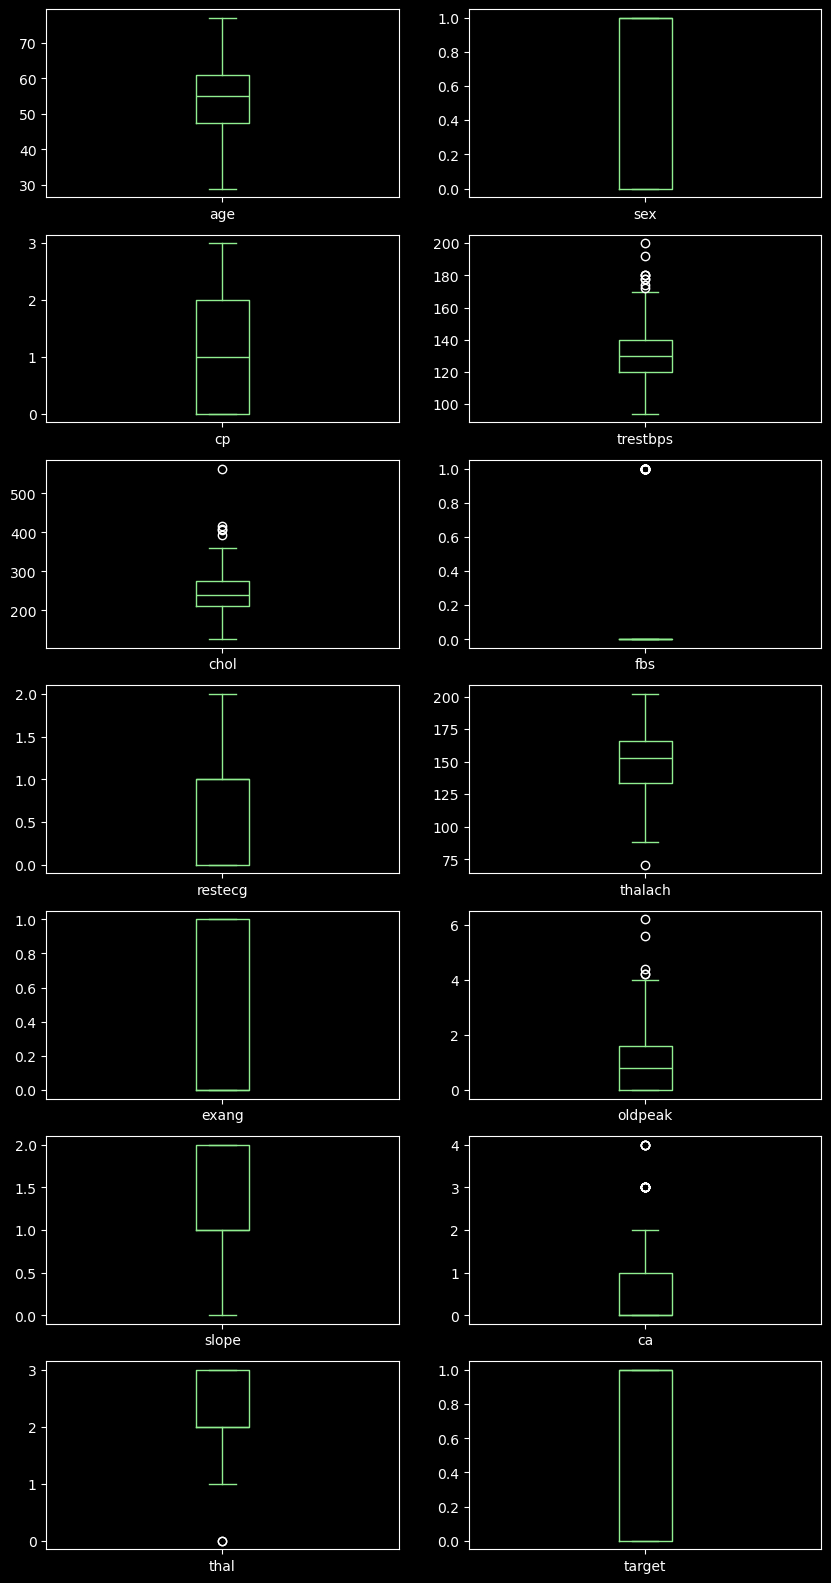

In [6]:
# Let's check for outliers

# Create box plots
heart_disease_df.plot(kind='box', subplots=True,
                      color='lightgreen', layout=(7, 2), figsize=(10, 20))
plt.show()

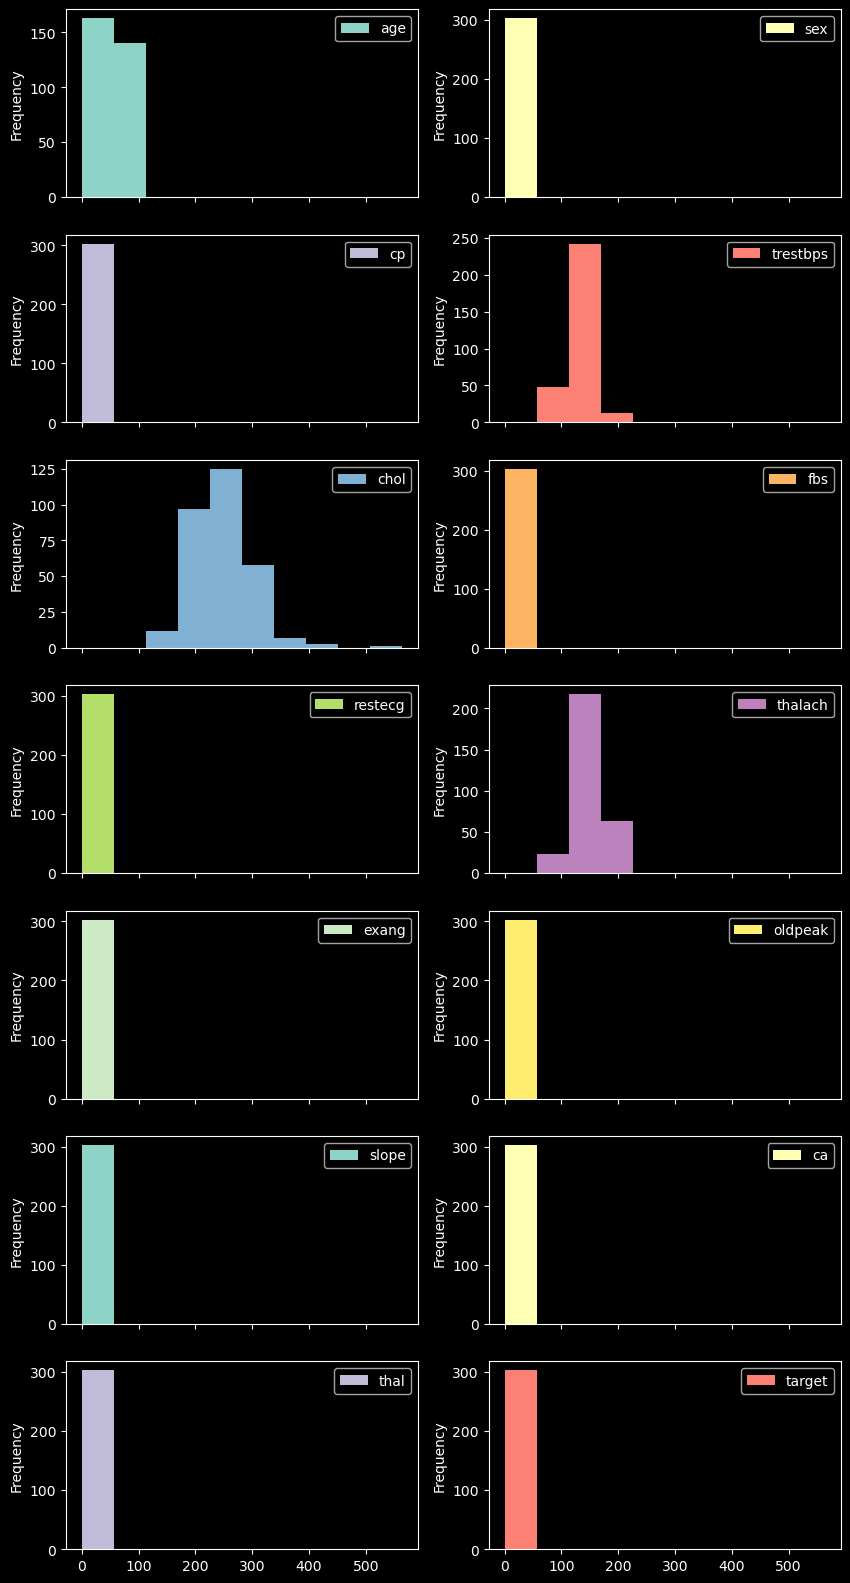

In [7]:
# Now, let's plot Histograms.
heart_disease_df.plot.hist(subplots=True, layout=(7, 2), figsize=(10, 20))
plt.show()

`Note : I think, Danial sometimes really mashes up with the workflow !!`
`Especially, when I'm trying to create notes, Just Importing New big, dirty data to follow Scikit-learn Workflow Again !!`


### **Feature Encoding :**

#### OK, for Data Preprocessing, let's convert all the columns into numerical format first !!

- Converting Categorical Variables to Numerical Ones!


In [8]:
car_sales_df = pd.read_csv("./All CSVs/car-sales-extended.csv")
car_sales_df.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
# Now let's Check it's columns, datatypes etc.
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


### Here, we found 5 columns, 2 out of which aren't numerical. And as we know here.

#### **In Supervised Learning, we are trying to predict Car prices, it's a continuous value (In currencies). Hence, we should run a regressor model.**

**And also, for a regression model, we must feed it data with numerical values only!! that's why we're doing Feature Encoding.**


In [10]:
# If we Try to train ML Model without Encoding categorical variables.

# Just differentiate predictor variables and target variable. (Into x & y)


# Let's quickly Divide the Data!
from sklearn.ensemble import RandomForestRegressor
x = car_sales_df.drop("Price", axis=1)  # Predictor Variables
y = car_sales_df["Price"]  # Target Variable


Random_Forest_Reg = RandomForestRegressor()

# This will raise "ValueError".
# RandomForestregModel.fit(x, y) # i.e. Could not convert String to Float.

### Let's Encode Our Categorical Features :


In [11]:
# Scikit-learn submodule
from sklearn.preprocessing import OneHotEncoder  # Feature Encoder
# Transformer will fit Encoder within itself
from sklearn.compose import ColumnTransformer

# Let's define categorical features.
# Why Doors? Cause it has only 3 possible values. Let it categorical.
categorical_features = ["Make", "Colour", "Doors"]

# Our One_Hot Encoder object
one_hot = OneHotEncoder()

# Column Transformer : Fit desired Encoder to specific subsets of Columns.
transformer = ColumnTransformer(
    # Must be a list/tuple of Encoder and column subsets.
    transformers=[("One_Hot", one_hot, categorical_features)],
    remainder="passthrough"  # Let remaining columns stay!
)

In [12]:
# Now Let's Encode `Predictor Variables`
transformed_x = transformer.fit_transform(x)

pd.DataFrame(transformed_x)  # Encoded Variables | Everything Numerical

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### **`One-Hot Encoder (One-Hot Encoding)`**

- One-Hot Encoding is a technique used in machine learning to convert categorical data (data that represents categories or labels) into a numerical format. It works by creating binary columns for each category or label, where each column represents the presence or absence of a specific category. This helps machine learning models work with categorical data, as they require numerical input.

- For example, if you have a "Color" column with categories like "Red," "Blue," and "Green," one-hot encoding would transform it into binary columns, each corresponding to one color. If an item is "Red," the "Red" column gets a 1, and the others get 0. This way, machine learning algorithms can handle categorical data without making assumptions about the relationships between categories.

#### **Here's one more way to do it with Pandas :**


In [13]:
# Transforms Categorical Columns via one_hot Encoding
pd.get_dummies(car_sales_df[categorical_features])

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


#### Let's split the Data into **Training/Testing sets :**


In [14]:
# Splitting the Data For training | Testing purpose.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    transformed_x, y, test_size=.20)

##### **Let's Train our Model With brand new Encoded Variables :**


In [15]:
# Fitting the Data into Model i.e. Training
Random_Forest_Reg.fit(x_train, y_train)

Random_Forest_Reg.score(x_test, y_test)

0.1848281865083642

In [16]:
print(
    f"Total Accuracy : { Random_Forest_Reg.score(x_test, y_test) * 100:.3} %")

Total Accuracy : 18.5 %


**Hence, the Accuracy of the Model is pretty bad, this is because of the Available Feature (predictor) variables. It was really Hard to predict the Price Using only this Data.**


<hr>

### **What if we got Missing values in our DataSet??**

**Handling missing values :**

- What if got missing values in our Data set?? It can problem with outcome!
- We Must deal with missing values to ensure completeness of the data.
- Also in Feature Encoding, missing values can lead to wrong outcomes.

**There're many ways to Handle missing Data relative to the nature of Data we have!!**

1. Fill the Missing values with appropriate ones (Imputation).
2. Remove the rows with missing values.

`Has Our current DataFrame missing values ??`


In [17]:
# Check for missing values.
print("Is there any missing values ??", car_sales_df.isna().values.any())
# No, it has no missing values at all.

Is there any missing values ?? False


#### **_Let's Import Another Data Set that contains missing values to Handle it!!_**
`Note : We used pandas to fill missing values here.`  We'll also do it in skLearn.

In [18]:
# import to DataFrame
car_sales_missing_df = pd.read_csv(
    "./All CSVs/car-sales-extended-missing-data.csv")
car_sales_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [19]:
# Let's check Total missing values
print(f"""
    Does this DF has missing values? , {car_sales_missing_df.isna().values.any()}
    How many missing values are there? , {car_sales_missing_df.isna().values.sum()}                

    Now, we have to deal with these values !!
    It may produce wrong outcomes, incorrect data transforms etc.
""")


    Does this DF has missing values? , True
    How many missing values are there? , 249                

    Now, we have to deal with these values !!
    It may produce wrong outcomes, incorrect data transforms etc.



**Also, features encoding with this DataFrame gives error in older version of Sklearn <br>As one_hot Encoder couldn't deal with NaN values with older versions**
<br> Still, in newer versions, we must deal with missing values to get correct & complete outcome.


In [20]:
# Let's see missing values column wise.
car_sales_missing_df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
# Filling Missing values can never be accurate!! (Of course it's dummy data at all)

# We can use central tendencies (mean/mode/median) for filling numerical columns.
# For categorical columns | let's just fill "missing" string for now.

# Fill only the Feature columns for now, we'll drop all rows missing Price (it's crucial, we have to predict it)

car_sales_missing_df["Make"].fillna("missing", inplace=True)  # Make column

car_sales_missing_df["Colour"].fillna("missing", inplace=True)  # Colour col

# We'll interpret "Doors" column as categorical | Fill it with most common value for "Doors" a.k.a "MODE"
car_sales_missing_df["Doors"].fillna(
    car_sales_missing_df.Doors.mode()[0], inplace=True)

# Filling Odometer with mean value
car_sales_missing_df["Odometer (KM)"].fillna(
    car_sales_missing_df["Odometer (KM)"].mean(), inplace=True)

In [22]:
# Let's check Again
car_sales_missing_df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Keeping rows where "Price" is NaN, is dangerous for accuracy!!
# Hence, dropping the rows with Price as NaN

car_sales_missing_df.dropna(inplace=True)

# Cleaned Data !
print(f"{len(car_sales_missing_df)} rows remaining")
car_sales_missing_df.isna().sum()

950 rows remaining


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

#### **What is Feature Scaling ??**

Feature scaling refers to putting all of our Features (predicting variables) on the same scale of magnitude.
<br>It comes under Data Preprocessing to make the Data Correct & clean for ML Algorithms.

#### **Why it's necessary ??**

Often, we'll have our Features with different units that can greatly vary in magnitude ranges.
<br>The values (magnitudes) of our Features can vary so much, that it makes ML Algorithms hard to find patterns and train efficiently.

It makes ML Algorithms to inaccurately calculate distances b/w two data points
<br>i.e. it may weigh **feature with high magnitude** more than the feature with **low magnitude** units.

To suppress this issue, we need to have our **Features on the same scale** i.e. on the same level of magnitude.

That is why we have to **Scale our Features**.

`Note : There are algorithms which are affected greatly by this varying ranges of Features, but also algorithms which have no effect due to this issue.`<br>

`Not all ML algorithms required feature scaling !!`



**Feature Scaling is given [Here](./Images/Feature_Scaling.png)**

I read from these 3 articles mainly provided by the Instructor!!
Given here : [1](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/), [2](https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310), [3](https://benalexkeen.com/feature-scaling-with-scikit-learn/)

`We'll do it when needed.`

---

#### **Let's try to fill missing values with SciKit-Learn :**

we've learned how to fill missing values with Pandas, we just filled based on overall data, **instead it is suggested to fill data separately for training and testing sets.**

`To prevent data leakage.` It should be :

* Split your data first (into train/test), always keep your training & test data separate.

* Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

* Don't use data from the future (test set) to fill data from the past (training set)

This approach is a correction in newer update of the course.<br>
`The Entire update is given in the provided` [google colab Notebook](https://colab.research.google.com/drive/162DyoCBFeufMjJI7n4XCiYpdqIdktZw_).

##### **Let's fill missing data using scikit-learn following the above approach.**

Scikit-Learn provides a class called [`sklearn.impute.SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given `strategy` parameter.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.

In [24]:
car_sales_missing_df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

Let's reimport this to have missing values. So, we can fill it with Scikit-learn.

In [25]:
car_sales_missing_df = pd.read_csv(
    "./All CSVs/car-sales-extended-missing-data.csv")
car_sales_missing_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
# Let's check for missing values.
car_sales_missing_df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##### Let's fill missing values but at first, we'll split the dataset into separate Training and Testing sets, then fill the values.

* **We're doing this to Prevent data leaks.**
* **We shouldn't have data from test sets in our training set. To score model genuinely.**
  
  Let's split :
To begin, we'll remove the rows which are missing a `Price` value. (this shouldn't be imputed to improve efficiency.)

In [27]:
# Drop rows missing a Price value.
# Drop 50 rows.
car_sales_missing_df.dropna(subset="Price", inplace=True, ignore_index=True)
car_sales_missing_df.isna().sum()  # Dropped

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [28]:
# Let's split the data into inputs(Feature variables) and labels (target).
x = car_sales_missing_df.drop('Price', axis=1)  # Features
y = car_sales_missing_df['Price']  # Target


# Splitting into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

##### Fill missing values with scikit-learn.

In [29]:
# Fill missing values with scikit-learn | SimpleImputer
# Importing SimpleImputer for imputing missing values
from sklearn.impute import SimpleImputer
# Importing ColumnTransformer to transform specific columns with imputer.
from sklearn.compose import ColumnTransformer

# For categorical columns ('Make', 'Colour'), missing values will be filled with the string 'missing'.
category_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# For the numeric column 'Doors', missing values will be filled with the most frequent value (Mode).
door_imputer = SimpleImputer(strategy='most_frequent')

# Fill numerical missing data with "mean" of that "column".
num_imputer = SimpleImputer(strategy='mean')

# Define columns to apply these imputers on.

category_columns = ["Make", "Colour"]  # Categorical columns
# Doors, though numeric, treated as categorical for mode imputation
door_column = ["Doors"]
num_columns = ["Odometer (KM)"]  # Numeric column

# Create an imputer to fill missing values (Something that fills missing data)
imputer = ColumnTransformer(  # To transform different columns using multiple imputers.
    [
        # Apply category imputer to categorical columns
        ("cat_imputer", category_imputer, category_columns),
        # Apply door imputer to the 'Doors' column
        ("door_imputer", door_imputer, door_column),
        # Apply numeric imputer to the 'Odometer (KM)' column
        ("num_imputer", num_imputer, num_columns)
    ]
)

# Fit transform using x_train data on x_train.
x_train_filled = imputer.fit_transform(x_train)

# Here "x_test" is avoided to be used in fit_transform.
# To avoid "Data Leakage" from test set to training set (Improves Evaluation).

# Then, learned transform (learned via x_train) should be used on x_test to impute (fill) missing values.
x_test_filled = imputer.transform(x_test)

In [30]:
# Converting x_train_filled & x_test_filled (ndarray) to Pandas DataFrames
# We Needed Data Frames to apply Feature encoding using specific column names.

x_train_filled = pd.DataFrame(x_train_filled, columns=[
                              "Make", "Colour", "Doors", "Odometer (KM)"])
x_test_filled = pd.DataFrame(x_test_filled, columns=[
                             "Make", "Colour", "Doors", "Odometer (KM)"])

(type(x_train_filled), type(x_test_filled))

# Let's see, missing data is gone!!
x_train_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [31]:
# See filled test data if any missing value remaining?
x_test_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

#### **Now, let's Encode our categorical Features to make them numerical :**

In [32]:
# Importing "OneHotEncoder" & "ColumnTransformer" to transform categorical Features.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Categorical features to be Encoded.
# Treating doors as categorical.
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()  # Encoder

# Transformer to transform data using OneHotEncoder
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)

# Transform "x_train_filled" categorical columns to numericals (Feature Encoding)
transformed_x_train_filled = transformer.fit_transform(x_train_filled)
transformed_x_test_filled = transformer.transform(x_test_filled)

Data is Filled (No-missing) & Encoded (categorical features into numerical features).

Now, let's train a regression model.

In [33]:
# Importing RandomTreeRegressor Model
from sklearn.ensemble import RandomForestRegressor

regressor_model = RandomForestRegressor(100)  # Initialize model

# Training Model
regressor_model.fit(transformed_x_train_filled, y_train)

print(
    f"Model Accuracy : {regressor_model.score(transformed_x_test_filled, y_test) * 100: .2f} %")

Model Accuracy :  15.40 %


# **2. Choosing the right estimator/Algorithm/Model for your problem.**

Some things to note :

* Sklearn refer to ML Models, algorithms as **Estimators**.
* **Classification Problem** - predicting a category (Email is **Spam or not**).
    * Often, you'll see `clf` (short for classifier) used as a Classification Estimator.
* **Regression Problem** - predicting a continuous value (a number) i.e. Predicting **price of a car**.

If you're confused in selecting model on a problem while using **SKlearn**.<br>
Refer to the following [Sklearn ML Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

### 2.1 Picking a machine learning model for a regression problem

SKlearn provides a wide range of DataSets to practice on.
You can get them by `sklearn.datasets.yourdataset`.

Read [sklearn.datasets](https://scikit-learn.org/stable/datasets.html#datasets). What are **loaders** & **fetchers** etc.

Let's use the California Housing dataset (a real world dataset) - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [34]:
# Let's fetch the data according to the documentation.
# We'll get a Bunch (dictionary like) object.
# This func. will download & load it to the variable.
from sklearn.datasets import fetch_california_housing

housing_dictionary = fetch_california_housing(
    as_frame=True)  # Get data-value as a DataFrame

housing_dictionary  # Let's view it.

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [35]:
# We got a lot of information.
# Let's convert the Features & Target into Single "Pandas DataFrame" first.

# Contains the DataFrame with "frame" key
housing_df = housing_dictionary["frame"]

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [36]:
# Here's the Description of the DataSet we're using.
print(housing_dictionary["DESCR"])

# The target variable is the median house value for California districts,
# expressed in hundreds of thousands of dollars ($100,000).

# Target Column -> MedHouseVal

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [37]:
# Let's Change the Target name.
# "MedHouseVal" to "target" to better understand our objective.
housing_df.rename(
    {"MedHouseVal": "target"},
    axis=1,
    inplace=True
)

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
# see columns information & missing values.
print(housing_df.info(), end="\n\n")  # It says every column is "Not null"
print(housing_df.isna().sum())  # Our data is clean as f**k.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


##### **OK so our data is Perfect.**
##### **It's Clean, Formatted & ready to use.**

**Let's Train a Model Based on the "Choosing Estimator Map" below:**

![](https://scikit-learn.org/stable/_static/ml_map.png)

In [39]:
# We're not sure, whether "few features should be important" or not!
# Hence, we're trying "Ridge regression" model.
from sklearn.linear_model import Ridge

np.random.seed(7)  # random seed to replicate same training & testing data.

# First, let's split into "Features" (x) & "Target" (y).
x = housing_df.drop(columns="target")  # Drop target remaining features.
y = housing_df["target"]  # Target column

# Split data into "training & testing sets". | 25% as testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Let's create and fit/train model with Ridge regression.
# Hyperparameter "alpha" must not be zero, else it'll be similar to a LinearRegression model.
model = Ridge(alpha=1)
model.fit(x_train, y_train)

# Let's evaluate our model on test set.
model.score(x_test, y_test)

0.6070119883512886

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [40]:
# Let's import RandomForestRegressor model from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model.
model = RandomForestRegressor(n_estimators=90)
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.7965674619472307

##### Pretty Good!!

Ensemble learning is the combination of several base models to in order to improve generalizability / robustness of a single model.

**Random Forests** are famous algorithms in it.

Random forests are combinations of lots of different decision trees.

A decision tree is an excellent algorithm of **Supervised Learning**.<br>
Which is like an **If-else tree** that can solve both regression & classification problems.



### **2.2 Picking a Machine Learning model/Estimator for a classification problem.**

* Let's see the Map : https://scikit-learn.org/stable/_static/ml_map.png

* We're using built-in **"breast cancer"** data. See it [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

In [41]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer(as_frame=True)

breast_cancer_data

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [42]:
# Let's storerbreast_cancer_data.datathe data into a DataFrame.
breast_cancer_df = breast_cancer_data["frame"]  # Get DataFrame.
breast_cancer_df.head()  # We have a lot of Features!! (30 of them)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [43]:
# Let's split the data into "Features" & "Target"
x = breast_cancer_df.drop(columns="target")  # Predicting variables.
y = breast_cancer_df.target  # Get target

In [44]:
# Let's get info about each column
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**It's kind of hard to Analyze this data and Visualize it.**<br>
**Just with some EDA, Let's train our model.**

In [45]:
# Let's view some Statistical measures.
breast_cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


**Now as we know, we have three types of each feature :**
1. Actual mean value.
2. Error of the Feature.
3. Worst Value of the Feature.

Let's assume the later two, of very `less significance for now` !!<br>
We'll drop features having **"error & worse"** values.

**Also Our Features need to be scaled !!** 
Feature scaling is already defined [here](./Images/Feature_Scaling.png).

Let us use `StandardScaler` class to scale our remaining feature to the **same level of Magnitude.**
  

In [46]:
# Dropping unnecessary features.
x_dropped = x.drop(
    columns=[col for col in x.columns if ("error" in col or "worst" in col)])
x_dropped  # Remaining columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [47]:
# Let's scale our features via "standard Scaler class" (Standardization)
from sklearn.preprocessing import StandardScaler
# Using object directly to fit & transform.
x_standardized = StandardScaler().fit_transform(x_dropped)
# Features after standardization.
x_standardized = pd.DataFrame(x_standardized, columns=x_dropped.columns)
x_standardized

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


**Splitting the data into `Training & Testing` Sets**.<br>
**And Using an Estimator using the `sklearn` ML Map.**

In [48]:
# Let's split the data into "Train and Test"
# Then fit it to the model.
from sklearn.svm import LinearSVC
np.random.seed(7)  # For replication
x_train, x_test, y_train, y_test = train_test_split(
    x_standardized, y, test_size=0.25)

# Using "LinearSVC" based on the Sklearn ML map.
# model with default parameters # Dual=True to suppress FutureWarning.
model = LinearSVC(dual=True)

# Fit the model on training set
model.fit(x_train, y_train)

# Get the score on testing set
score = model.score(x_test, y_test)

print(f"Accuracy of the Linear SVC model on Breast_Cancer_DataFrame : {score : .2%} \n\
    Oh my god!!, That's a pretty good Accuracy score!!")

Accuracy of the Linear SVC model on Breast_Cancer_DataFrame :  95.10% 
    Oh my god!!, That's a pretty good Accuracy score!!


**Let's still try a different model!!, "An Ensemble model."**<br>
It's usually performs better due to combinations of multiple base models.

In [49]:
# Using same training & testing data sets to "ensemble.RandomForestClassifier" model.
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
model = RandomForestClassifier()  # Random forest classifier
model.fit(x_train, y_train)  # Fit/Train model.

score = model.score(x_test, y_test)  # Score model

print(f"Accuracy of Random Forest Classifier : {score : .2%}")
print("It's somewhat improved!!")

Accuracy of Random Forest Classifier :  96.50%
It's somewhat improved!!


Tidbit:
    
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

# **3. Fit the model/algorithm and use it to make predictions**


### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, predicting variables, data
* `y` = labels, targets, output, target variables

### **What fitting actually means??**

**Fitting/Training** the model actually means finding the patterns in the given **Training data (x_train, y_train)**, and <br>figuring out the how particular **input patterns** produces corresponding **outputs/target**!

These depends on the **ML Model/Algorithm** we're working with, <br>
each ML model has an underlying **statistical model/algorithm**, that fits the data, finds patterns in it. <br>
And then comes up with a model (formula) to derive or predict the Target based on the given inputs (With the patterns learned on training data)

In [50]:
np.random.seed(7)  # for reproducibility
# Let's see how our training data looks like.

# View x_train | Features for training our model | to learn the patterns.

display("Features", x_train.sample(5))

display("Target | Output", y_train.sample(5))

'Features'

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
180,3.718515,0.600465,3.712513,4.536659,0.927977,1.649897,2.489659,3.582290,-0.042419,-0.722639
130,-0.550218,-1.396158,-0.530902,-0.566230,0.728714,-0.175320,-0.756428,-0.518437,0.249657,0.271101
512,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,1.481735
453,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060
424,-1.245485,-0.039478,-1.237314,-1.038635,0.792763,-0.398189,-1.002707,-0.754452,2.651977,1.062124


'Target | Output'

315    1
72     0
479    0
387    1
11     0
Name: target, dtype: int32

In [51]:
# Let's again demonstrate the Training process of the model.

# x_train = Our Training Features (training data)
# y_train = Our Training Labels (training data)

# Random Forest Classifier
model.fit(x_train, y_train)  # Training Data i.e. Learning underlying patterns.


# Predicting random labels for the input.
random_15_indices = np.random.randint(0, len(x_test), size=15)

print("Predictions of few test records are : ", preds :=
      model.predict(x_test.iloc[random_15_indices]))
print("Actual labels of the test records are : ",
      actuals := y_test.iloc[random_15_indices].values)

print(f"\nAccuracy of our manual prediction is : {(preds == actuals).mean():.2%}\
    \nWe got pretty good accuracy.")

Predictions of few test records are :  [1 0 0 1 1 1 0 1 1 0 1 0 1 1 1]
Actual labels of the test records are :  [1 0 0 1 1 1 0 1 0 0 1 0 1 1 1]

Accuracy of our manual prediction is : 93.33%    
We got pretty good accuracy.


### **3.2 Make predictions using a machine learning model**

`Spoiler` : Actually we are making predictions from the beginning. Also we've done a lot of things already (that may come in future). <br>

Predicting from a trained model, means using the learned patterns during the fitting/training process<br>
to predict the outcome of new input data.


2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

* Now, What type of input data does predicting functions need ?? What do you think?

In [52]:
# Using any arbitrary data format | shape to predict via our trained regression model.

# model.predict([3, 4, 5, 2]) # This line will raise "ValueError".

# Cause it need the same shape of data it is trained on.

# Something like x_test!!
print(f"Shape of x_test : {x_test.shape}")
x_test.head()

Shape of x_test : (143, 10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
350,-0.700746,-0.516527,-0.752505,-0.665205,-1.476703,-1.289477,-1.010591,-0.962094,-0.513391,-0.777926
259,0.398389,3.320807,0.483201,0.256000,0.707364,1.128731,1.083503,0.904617,1.020006,0.524852
115,-0.624062,0.521345,-0.635937,-0.615148,0.093918,-0.489914,-0.697043,-0.743876,-0.451325,-0.121575
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,0.964310
275,-0.635423,-0.449042,-0.649530,-0.623681,1.860245,-0.611014,-0.370489,0.647967,0.742534,-0.573791


In [53]:
# Ok so let's make predictions using this test data.
# Predicting using learned relationships & patterns
preds = model.predict(x_test)
# This are just outputs or targets or Labels to x_test records (input data)
preds

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [54]:
# let's view actual labels | outputs for these input test records
y_test.values  # They are little different.

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [55]:
# Let's compare our RandomForestClassifier Predictions
# with Actual labels/Outputs to evaluate the model.
# It's mean accuracy of predictions of all test inputs.
(preds == y_test).mean()

0.965034965034965

In [56]:
# It is same as `model.score()` Method.
# sklearn also scores "Classification" models like this.
model.score(x_test, y_test)  # Same float!!
# There are lots of Evaluating methods like this.

0.965034965034965

Make predictions with `predict_proba()` - use this if someone asks you "what's the probability your model is assigning to each prediction?"

`predict_proba()` is the function used to get the probability related to each of our **classes or Category**.<br>
It is available in **Classification** models.

Our trained model predicts the Probability of each Label / Class to happen on a specific record.<br>
Based on the maximum probability of a specific "Category", it predicts that "Class" while using `classifier.predict()` method.

In [57]:
# It return the probability of all classification labels.
# sorted by the class/label/category. In this case :

# [p(0), p(1)]
model.predict_proba(x_test[:5])  # They're very strong probabilities.

array([[0.  , 1.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.27, 0.73]])

In [58]:
# Let's predict() on the same data
model.predict(x_test[:5])

array([1, 0, 1, 1, 1])

In [59]:
# Let's see actual labels to these inputs.
y_test[:5].values  # It's 100% Correct.

array([1, 0, 1, 1, 1])

`predict()` can also be used on **regression models** | We done it a lot!!

In [60]:
# Let's create a regression model using Housing data.
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [61]:
# Import RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(7)  # for reproducibility

# let's split into x (Features) & y (Labels)
x = housing_df.drop("target", axis=1)  # Features
y = housing_df["target"]  # Outputs | Labels


# Let's split our data into "Training & Testing" sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Let's train our model on "Training set"

Random_Forest_Reg = RandomForestRegressor()  # With default parameters

# Fit the model on the training data | Train the model.
Random_Forest_Reg.fit(x_train, y_train)

# Make the prediction | Using `predict()` function
y_preds = Random_Forest_Reg.predict(x_test)
print(
    f"Accuracy (R^2) of this model : {Random_Forest_Reg.score(x_test, y_test) : .2%}")

Accuracy (R^2) of this model :  79.65%


In [62]:
# Our predictions are :
y_preds[:10]

array([2.43547  , 2.83916  , 2.9830903, 3.6476315, 4.9401392, 4.6822665,
       2.24736  , 1.3704701, 1.02075  , 3.5825106])

In [63]:
# Actual output values (Continuous values)
y_test.values

array([3.6  , 3.36 , 2.699, ..., 2.205, 1.214, 3.599])

In [64]:
# Now there are various methods to Evaluate our predictions.
# Such as MAE - Mean Absolute Error | We'll see much Evaluation metrics later in the course.
from sklearn.metrics import mean_absolute_error
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_preds)}")

# It's a way to calculate Error.
print("These way it's calculated : ", (abs(y_test - y_preds).mean()))

Mean Absolute Error : 0.3412516373062017
These way it's calculated :  0.3412516373062017


# **4. Evaluating a machine learning model**

Three built-in ways to evaluate Scikit-Learn models/estimators: 

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html 

### 4.1 Evaluating a model with the `score` method

* Let's score a **Classification** model.
* Classification model's built-in `score` method uses **"Mean accuracy"** to score prediction.

In [65]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(77)  # for reproducibility

# Make Features & Target of the "Heart Disease" Data
x = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

# Split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Instantiate the Random Forest Classifier Model.
clf = RandomForestClassifier(n_estimators=500)

# Fit the model to the data (training the ML model).
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [66]:
# Using built-in model's "score" method.
# Here, max accuracy is 1.0 & min accuracy is 0.0

# Try on "training data" itself, let's see what happens.
# 1st arg : Input to predict on | 2nd arg : Truth labels to inputs.
clf.score(x_train, y_train)
# It's 100%, cause it has trained on "training data" itself.
# It has learned it already | Every average model will predict 100% on the training data it has trained on.

1.0

In [67]:
# Let's give it "Test data", it has never seen it.
clf.score(x_test, y_test)  # It's 86%, it predicts good.
# It scores based on "Mean Accuracy".

0.868421052631579

Let's use the `score()` on our regression problem.

* Regression model's `score()` method uses **"Coefficient of determination (R<sup>2</sup>)
"** as scoring method.

In [68]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(77)  # for reproducibility

# Create "Features" & "Labels".
# Using "House_price Data" | It needs to predict continuous price values.
x = housing_df.drop(columns="target")
y = housing_df.target

# Spiting into "training & testing" sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Create "Random Forest Regressor" model
regressor_model = RandomForestRegressor()

# Train our regression model.
regressor_model.fit(x_train, y_train)

# Model trained!!

RandomForestRegressor()

In [69]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0

# Let's score on "test data"
regressor_model.score(x_test, y_test)  # Great!! 79% !

0.8029916530762304

### 4.2 Evaluating a model with the `cross validation` method
(Later will use `scoring` parameter in this function)

#### **Cross Validation :**


Cross-validation is designed to **estimate** how well a **model will generalize to unseen data.** It simulates this by repeatedly training and evaluating the model on different subsets of the **training data**, ensuring that all data points are eventually used for both training and testing.

#### **Benefits Cross-Validation:**

* More reliable performance estimation **than a single train-test split.**
* Helps in **model selection and hyperparameter tuning.**
* Detects overfitting.
* Uses a **validation set** internally. 
* Reduces the impact of random variations in the data split.

#### **Key points :**

* Use `cross_val_score` with the entire dataset for model selection.
* Use `cross_val_score` with the training data only for hyperparameter tuning.
* Always evaluate the final, tuned model on a held-out test set for an unbiased assessment of its real-world performance.


You should use only the training data (x_train, y_train) with sklearn's `cross_val_score`.

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

* Let's use `cross_val_score` to evaluate the model fitness on the data with **cross validation method**.
  
* Trying on a **Classification model**.

In [70]:
# To score using "Cross validation"
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier # Model
np.random.seed(77) # For reproducibility

# Splitting into "Features" & "Labels"
x = heart_disease_df.drop(columns="target")
y = heart_disease_df["target"]

# Splitting into Training and Testing sets
# This single train-test split can have "Chance goodness or badness" for specific splits.
# While Cross Validation eliminates it with multiple train-test splits.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Creating model
clf = RandomForestClassifier() # With default parameters

# Let's train the model with Training set.
# This single split may have Good or bad patterns, affecting the evaluation.

clf.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
# Let's score on the test set | Single split
clf.score(x_test, y_test)

0.8552631578947368

In [72]:
# Score it using cross_val_score
# To score | Select a model, we should use Entire data i.e. x, y.

# People also use only training data here i.e. x_train, y_train.
# to test the fit of the model on the training data only for evaluation.

# However, we'll use entire x and y.

cross_val_score(clf, x, y, cv=5) # using 5-fold cross-validation

array([0.80327869, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

In [73]:
# Comparing single train-test split with Cross Validation
np.random.seed(77)
# Single split score
clf_single_score = clf.score(x_test, y_test)

# Mean of 5-fold cross validation scores.
clf_cross_val_score = cross_val_score(clf, x, y, cv=5).mean()

# Compare them together
clf_single_score, clf_cross_val_score

# We found "Cross validation" score less than the other.
# Because it leverages multiple splits

# Cross Validation is more reliable and accurate
# Evaluation method than single train-test split.

(0.8552631578947368, 0.838087431693989)

In [74]:
# We can see the default scoring metric of Classification models.
help(clf.score) # Mean accuracy.

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.ensemble._forest.RandomForestClassifier instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for `X`.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of ``self.predict(X)`` w.r.t. `y`.



In [75]:
# Cross validation have "scoring" parameter as None by default.
# This "Scoring" parameter defines the metric to be used for cross validation.

# When set "scoring = None", It uses the model's default "scoring method" (metric).
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.8852459 , 0.83606557, 0.81666667, 0.76666667])

Now, we know that we can use `scoring` parameter to define **specific or custom** scorers (Scoring metrics).
To use them, let's describe each (classification & regression) metrics in brief :

#### **4.2.1 Classification model evaluation metrics**

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

##### **Accuracy** 
Accuracy is a metric that measures the proportion of correctly classified instances among the total instances, providing a general overview of a **classification model's** overall correctness.

It's the default evaluation metric for sklearn's **classification** models.

In [76]:
# We have already trained our clf model.
clf.score(x_test, y_test)  ## mean accuracy.

0.8552631578947368

In [77]:
# We can also get mean of the accuracies
# from the "cross_val_score" method/technique.

# Mean Accuracy of Cross-Validation
print(
    f"Heart disease classifier\nMean accuracy of cross-validation : {clf_cross_val_score.mean():.2%}")

Heart disease classifier
Mean accuracy of cross-validation : 83.81%


##### **Area under the ROC curve (AUC/ROC)**

* Area under curve (AUC)
* ROC **(Receiver Operating Characteristic)** curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [78]:
# Make sure, our x, y data corresponds to "heart disease data"
x, y


(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [79]:
# Import ROC_curve metric from sklearn
from sklearn.metrics import roc_curve # binary classification.

# Already fitted classification model
clf

# Make predictions with probabilities | Chance of 0 or 1;
y_probs = clf.predict_proba(x_test)

## Let's see a few probabilities | sorted as 0, 1
y_probs[:10], f"total : {len(y_probs)}"

(array([[0.21, 0.79],
        [0.24, 0.76],
        [0.  , 1.  ],
        [0.23, 0.77],
        [0.99, 0.01],
        [0.46, 0.54],
        [0.88, 0.12],
        [0.48, 0.52],
        [0.09, 0.91],
        [0.22, 0.78]]),
 'total : 76')

In [80]:
# Calculate "probabilities of positive class" i.e. 1 or "has a disease"
# Probabilities of having a heart disease i.e. 1
# y_probs is sorted as prob(0), prob(1).

y_probs_positive = y_probs[:, 1] # Every row with column at 1 index.
y_probs_positive[:10] # see probabilities of having a heart disease

array([0.79, 0.76, 1.  , 0.77, 0.01, 0.54, 0.12, 0.52, 0.91, 0.78])

In [81]:
# Let's Compute "ROC" curve, It will Give "fpr", "tpr" & "thresholds".
# See docstring.
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check our "true positive rate"
tpr # It's ambiguous to understand | We'll visualize it soon!

array([0.        , 0.04651163, 0.06976744, 0.11627907, 0.13953488,
       0.18604651, 0.20930233, 0.34883721, 0.46511628, 0.48837209,
       0.53488372, 0.55813953, 0.60465116, 0.6744186 , 0.72093023,
       0.74418605, 0.74418605, 0.79069767, 0.8372093 , 0.8372093 ,
       0.88372093, 0.93023256, 0.95348837, 0.97674419, 0.97674419,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

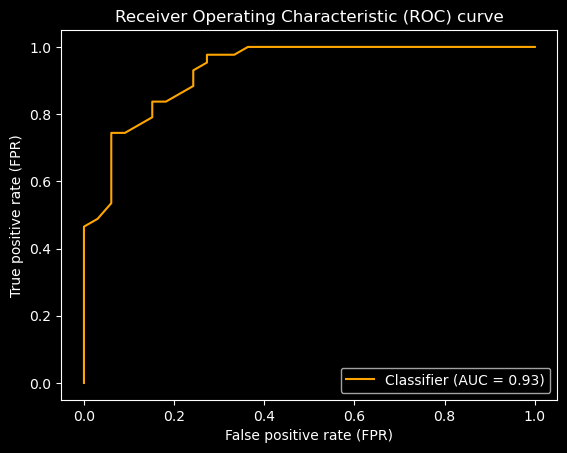

In [82]:
# Let's visualize our "ROC" curve | Comparison of "tpr" Vs "fpr"
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(
    y_test,
    y_probs_positive,
    color="orange"
)

# Customize plot
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (FPR)")

plt.plot();

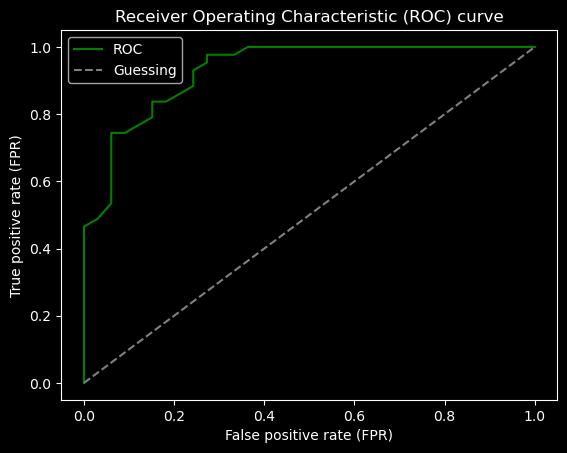

In [83]:
import matplotlib.pyplot as plt
## With Instructor 
## Creating a function for plotting "ROC" curves
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the False Positive Rate "FPR"
    and True Positive Rate "TPR" of a model.
    """

    # plot the ROC curve
    plt.plot(fpr, tpr, color="green", label="ROC")
    # We can also plot a baseline for guessing "ROC" line
    plt.plot(
        [0,1], [0,1],
        color="grey",
        linestyle="--",
        label="Guessing"
    )

    # Customize
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (FPR)")

    plt.legend()
    plt.show()

# Let's use our function to plot "ROC" curve
plot_roc_curve(fpr, tpr)

In [84]:
# We can calculate the "AUC score" for our "ROC" curve
from sklearn.metrics import roc_auc_score

# It's pretty good!!
# As we can also see in the graph above!
roc_auc_score(y_test, y_probs_positive)

0.930584918957012

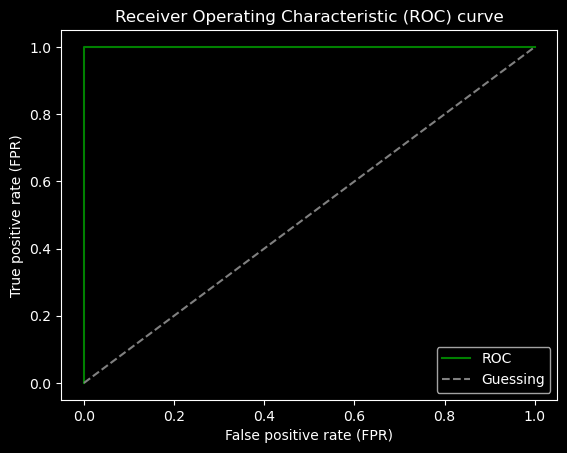

In [85]:
# Plotting idle "Perfect ROC curve" with Perfect AUC score

# fpr and tpr to get perfect ROC curve.
# y_test Vs y_test
fpr, tpr, _ = roc_curve(y_test, y_test)

# Plot it
plot_roc_curve(fpr,  tpr)

In [86]:
# Perfect AOC score
roc_auc_score(y_test, y_test)

1.0

* ROC curve & AOC metrics are great !! For more information on these metrics, bookmark the following resources and refer to them when you need:

    [ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM)  by StatQuest

    [ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) (contains code examples)

    [How the ROC curve and AUC are calculated](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by Google's Machine Learning team

##### **Confusion Matrix**
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

* **Anatomy of a confusion matrix.**
  
![](https://prod-images-static.radiopaedia.org/images/49024440/0f59a975b60e83f5309a5f59075e7f_gallery.jpeg)

In [87]:
# Let's create confusion matrix from sklearn.
from sklearn.metrics import confusion_matrix

# redeclaring y_preds by predicting using clf.
y_preds = clf.predict(x_test)

# Creating a confusion matrix of the Actual y values & Predicted y values.
confusion_matrix(y_test, y_preds)

# This is just Comparison of the predicted and actual y values.
# To Understand True_positive, True_Negative, False_Positive, and False_Negative values.

array([[25,  8],
       [ 3, 40]], dtype=int64)

In [88]:
# What was that??
# Let's visualize with a more convenient way

# Pandas.crosstab
pd.crosstab(
    y_test, 
    y_preds,
    rownames= ["y_actuals"],
    colnames= ["y_predicted"]
)

y_predicted,0,1
y_actuals,,
0,25,8
1,3,40


(Not Suggested but old way)
* Visualizing a confusion matrix using `seaborn.heatmap` method.
* `heatmap` is a 2D visualization technique to represent magnitude of individual values within a dataset.

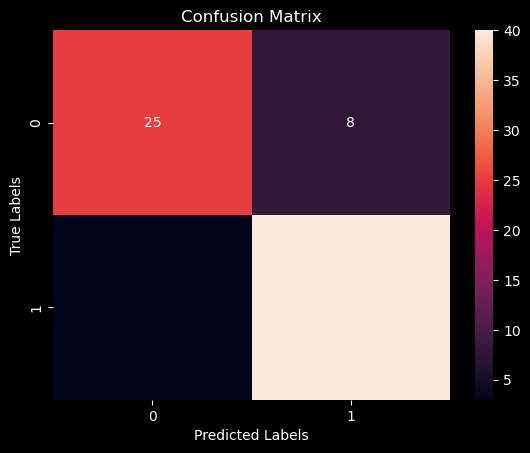

In [89]:
# It's bit complex to plot confusion matrix from "seaborn"
import seaborn as sns

# let's create our "Confusion matrix"
confusion_mat = confusion_matrix(
    y_test,
    y_preds
)

sns.heatmap(confusion_mat, annot=confusion_mat)
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

plt.show()

(Again Not Suggested but old way)

* Plotting our **"Confusion Matrix"** From "**matplotlib**".

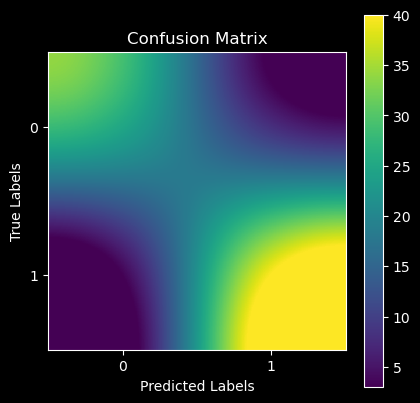

In [90]:
plt.matshow(confusion_mat, interpolation="sinc")

plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")
plt.gca().xaxis.tick_bottom()
plt.colorbar()

plt.show()

(Suggested Method)

**Using `ConfusionMatrixDisplay` Function**

* In `Sklearn 1.0+` versions, We have a function to plot metrics directly from the Sklearn Library.

There are multiple different implementations of plotting confusion matrices.

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.


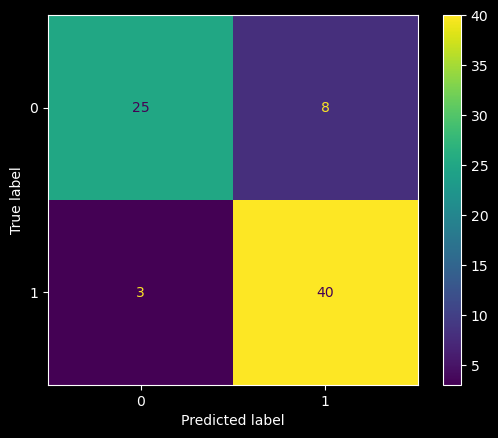

In [91]:
# Import.
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting from Estimator and x, y data.
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)
plt.show()

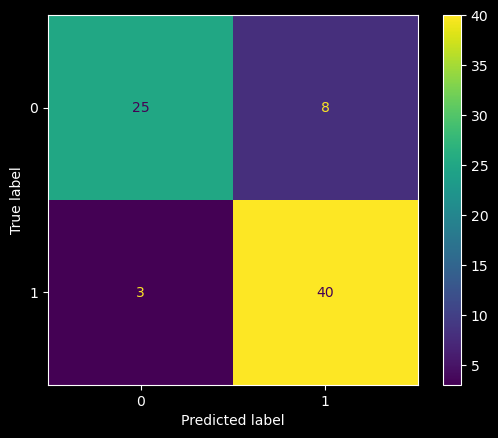

In [92]:
# Plotting Confusion matrix from predictions.
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
plt.show()

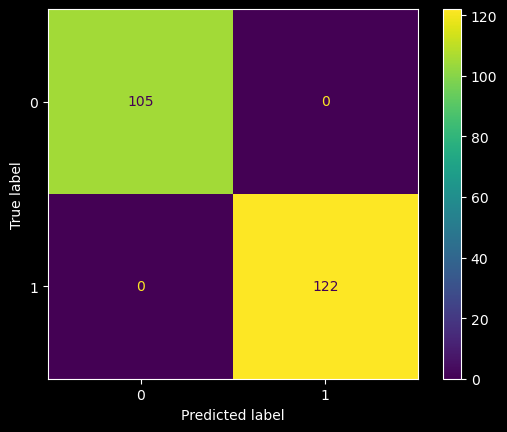

In [93]:
# If we plot, confusion matrix of training data | "It Will predict 100% Correct"
# Then False_Positive and False_Negative predictions will be 0.

ConfusionMatrixDisplay.from_estimator(clf, x_train, y_train)
plt.show()

##### **Classification Report**

A classification report in short is a **quick summary** of how well a ML classification model predicts different categories or classes. It typically shows:

* **Precision:** How often the model correctly identifies a specific category `(true positives / all predicted positives)`.

* **Recall:** How often the model correctly identifies all instances of a specific category `(true positives / all actual positives)`.

* **F1-score:** A harmonic mean of precision and recall, measuring the model's overall accuracy for that category.

* **Support:** The total number of data points belonging to each category.


In [94]:
# Import function to get Classification report.
from sklearn.metrics import classification_report

# print the classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



In [95]:
# Where precision & recall become important.
disease_true = np.zeros(1000)
disease_true[0] = 1 # only one positive case in Data.

# When model predicts every case as 0. (non-disease)
disease_preds = np.zeros(1000)

pd.DataFrame(classification_report(
        disease_true,
        disease_preds,
        output_dict=True,
        zero_division=np.NaN
    )
).T

## Here, we can see, accuracy doesn't finds ill behavior.
## But precision tells that there is no prediction for label "1".
## Hence, precision and recall are necessary here.

,precision,recall,f1-score,support
0.0,0.999,1.000,0.9995,999.000
1.0,NaN,0.000,NaN,1.000
accuracy,0.999,0.999,0.9990,0.999
macro avg,0.999,0.500,0.9995,1000.000
weighted avg,0.999,0.999,0.9995,1000.000


**Also,**

**Macro Average:**

* **Treats all classes equally:** Averages the individual metric (e.g., F1-score) for each class.
* **Focuses on fairness:** Ensures no single class, even a large one, unduly influences the overall score.
* **Useful for balanced datasets:** Provides a fair summary if classes are approximately **equal in size**.

**Weighted Average:**

* **Considers class sizes:** Averages the individual metric weighted by the number of data points in each class.
* **Focuses on overall accuracy:** Gives more weight to performance on larger classes.
* **Useful for imbalanced datasets:** Provides a more representative picture when dealing with classes of different sizes.

**To summarize classification metrics:**
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

Docs on Classification model evaluation metrics - [Click](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

#### **4.2.2 Regression model evaluation metrics**

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

##### **R<sup>2</sup>** | **Coefficient of determination**


The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable when predicting the outcome of a given event. In other words, this coefficient, more commonly known as r-squared (or R<sup>2</sup>), assesses how strong the linear relationship is between two variables.

**What R-squared does:** Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

It can be from **-inf to 1.**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEiWV4VUb8xCpcESmx_bK3nnuPNXQCwYCx7Q&usqp=CAU)
Read More on [Docs](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score).

* Let's quickly retrain a regression model to use **regression metric (R<sup>2</sup>).**

In [96]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(77) # for reproducibility

# Prepare "Features" & "Label" data
x = housing_df.drop(columns="target")
y = housing_df["target"]

# Split data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Let's create and fit the model to data.
model = RandomForestRegressor().fit(x_train, y_train)
model # Trained model

RandomForestRegressor()

In [97]:
# Regression model's default score method is also "r^2".
# Using from default "score" method

model.score(x_test, y_test)

0.8029916530762304

In [98]:
# Let's see Features and label.
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [99]:
print(f"""
As we know, R^2 measure the ability to predict "Label" (y, dependent variable)
with the help of "Features" (x, Independent variables). 
It tells how well we can do this.
      
Hence, our model gives the predictability of "{y.name}"
With the help of Independent variables :
{x.columns.values} in the particular case.
""")


As we know, R^2 measure the ability to predict "Label" (y, dependent variable)
with the help of "Features" (x, Independent variables). 
It tells how well we can do this.
      
Hence, our model gives the predictability of "target"
With the help of Independent variables :
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude'] in the particular case.



In [100]:
# Let's use the metric function instead of model's score method.
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test)), "Same R^2 as before"

(0.8029916530762304, 'Same R^2 as before')

In [101]:
# Here's our y_test 
y_test
# We know that, 
# if our model predicts mean of 'y_true' values each time.
# then it gets "0" R^2 Value,

16973    3.160
4732     2.547
11854    0.759
14574    3.031
17430    1.340
         ...  
6347     1.125
5937     2.128
5515     3.072
2549     0.705
20468    1.794
Name: target, Length: 5160, dtype: float64

In [102]:
## Let's mimic predicting Mean value of y_true, to get R^2 value as "0.0"
y_all_mean = np.full(len(y_test), y_test.mean())

# All predicted values as "mean" will result in "0.0" R^2 value.
r2_score(y_test, y_all_mean) 

0.0

In [103]:
# Also, all correct predicted values
# will result in perfect "1.0" R^2 Score
r2_score(y_test, y_test) # Perfect Prediction

1.0

##### **Mean absolute error ([MAE](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error))**

MAE is the average of the absolute differences between predictions and actual values. It's a **Risk Metric**.

It gives you an idea of how wrong your models predictions are.

It's the **Sum of Absolute Error b/w Predicted and true values** divided by **Sample size (n)**

In [104]:
# Let's import "Mean Absolute Error".
from sklearn.metrics import mean_absolute_error
# Let's create latest y_preds | We don't have yet.
y_preds = model.predict(x_test)
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_preds))
print("It means, at average we're off by at-least this value in our predictions.")

Mean Absolute Error :  0.33200407007751953
It means, at average we're off by at-least this value in our predictions.


In [105]:
# Let's calculate "MAE" manually to get the same number.
(y_test - y_preds).abs().mean()
# Same value.

0.33200407007751953

##### **Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [106]:
# Import the function for Mean Squared Error
from sklearn.metrics import mean_squared_error

print("Mean Squared Error : ", mean_squared_error(y_test, y_preds))

Mean Squared Error :  0.25965337931172133


In [107]:
# Again, let's calculate "MSE" manually.
np.square(y_test - y_preds).mean() # Same as above.


0.25965337931172133

In [108]:
## Just increasing a single error 
## Can affect our "MSE" because of "Squaring".
Errors =  y_test - y_preds

# let's amplify a single error
Errors.iloc[0] = 24 # Large value
(Errors ** 2).mean()

0.3712603768813143

In [109]:
# While this isn't the case with "MAE"
# "MSE" can handle outlier errors.

# It's just a bit more than actual "MAE"
Errors.abs().mean()

0.33659157589147304

##### **Mean Squared Error** amplifies the actual error by squaring it.
It gives pretty large Errors when the error is quite large.
But required for cases  where limited error are allowed.

While **Mean Absolute Error** gives Errors on the same scale.


*MSE (Mean Squared Error):*

* Squares errors before averaging them, giving more weight to larger errors.
* More sensitive to outliers.
* Not on the same scale as the original data.
* Useful for cases where even small deviations are highly undesirable.
* Aligns well with normally distributed errors.

*MAE (Mean Absolute Error):*

* Takes the average of absolute errors, giving equal weight to all errors.
* More robust to outliers.
* On the same scale as the original data, aiding interpretability.
* Often aligns better with human perception of error.

#### **4.2.3 Finally Using the `scoring` parameter**

We'll use the `scoring` parameter in the `cross_val_score` function. **(Cross Validation technique)**

I'm using Entire data (x, y) for cross validation, as explained above.
Because we're about to evaluate a model for *model_selection*, hence, we'll **cross validate** our model with different `scoring` values on entire dataset.

* First, let's use for a "**Classification Model**".

In [110]:
# Import our Classifier & cross validation function
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(77) # For reproducibility

x = heart_disease_df.drop('target', axis=1) # Features
y = heart_disease_df["target"] # Target label

# Create | Initiate our model
clf = RandomForestClassifier()


In [111]:
np.random.seed(77)

# Cross validation accuracies with scoring = None
# When scoring = None, the model's default score method is used.
cv_acc = cross_val_score(clf, x, y, cv=5) # 5-fold CV

# 5 different accuracies with 5-fold Cross-validation
cv_acc # Almost close to each other | low variance

array([0.85245902, 0.8852459 , 0.83606557, 0.81666667, 0.8       ])

In [112]:
# Mean Cross-Validated accuracy
print(f"The Mean cross-validation accuracy is : {cv_acc.mean() :.2%}")

The Mean cross-validation accuracy is : 83.81%


In [113]:
np.random.seed(77)

# Now, Let's use "accuracy" metric in our scoring parameter.
cv_acc = cross_val_score(
    clf,
    x,
    y,
    scoring="accuracy")

# Cross Validation with Accuracy metric.
# "Accuracy" is the default technique used in classification's score method.
cv_acc # It will be same as before.

array([0.85245902, 0.8852459 , 0.83606557, 0.81666667, 0.8       ])

In [114]:
# Again, calculate mean CV score.
# It'll be same as before.
print(f"The Mean cross-validation accuracy is : {cv_acc.mean() : .2%}")

The Mean cross-validation accuracy is :  83.81%


In [115]:
np.random.seed(77)
# Let's calculate "Precision" with CV.

cv_precision = cross_val_score(
    clf,
    x,
    y,
    scoring="precision"
)

# Precision for 5-folds (default)
cv_precision # Little high variance.

array([0.83333333, 0.93333333, 0.84848485, 0.84375   , 0.76923077])

In [116]:
# Mean cross-validated precision
print(f"The Mean cross-validation precision is : {cv_precision.mean():.2%}")

The Mean cross-validation precision is : 84.56%


In [117]:
np.random.seed(77)
# Recall

cv_recall = cross_val_score(
    clf,
    x,
    y,
    scoring="recall",
    cv=5 # default
)

cv_recall

array([0.90909091, 0.84848485, 0.84848485, 0.81818182, 0.90909091])

In [118]:
# Mean cross-validated recall
print(f"The Mean cross-validation recall is : {cv_recall.mean() : .2%}")

The Mean cross-validation recall is :  86.67%


Let's see the `scoring` parameter being using for a regression problem now...

In [119]:
# Import our Regressor with cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(77)

# "Features" & "Target"
# We can reduce the data if needed.
x = housing_df.drop(columns="target")
y = housing_df["target"]

# Create Model.
model = RandomForestRegressor()

In [120]:
np.random.seed(77)

# Cross validation with scoring=None

cv_default_r2 = cross_val_score(
    model,
    x,
    y,
    scoring=None # defualt
)

cv_default_r2 # Bad Performance.

array([0.50411013, 0.70462462, 0.74077689, 0.6151989 , 0.68084918])

In [121]:
# Mean Cross-validated r_2 score
print(f"The Mean cross-validation r_2 score is : {cv_default_r2.mean() :.2%}")

The Mean cross-validation r_2 score is : 64.91%


In [122]:
np.random.seed(77)
# Let's use Scoring = r_2
# We know it's default scoring method for regression models.

# It'll be same as before score.
cv_r2 = cross_val_score(
    model,
    x,
    y,
    scoring="r2",
    cv=2 # For Faster Output. | It will reduce the reliability.
)

# Output is different from above because of less Cross-validation rounds.
print(f"The Mean cross-validation r_2 score is : {cv_r2.mean():.2%}")

The Mean cross-validation r_2 score is : 61.11%


In [123]:
# Mean Absolute Error.
cv_mae = cross_val_score(
    model,
    x,
    y,
    scoring="neg_mean_absolute_error",
    cv=2 # Data is comparatively large
)

print(cv_mae)
print(f"The Negative Mean Absolute Error is : {cv_mae.mean()}")

[-0.54105995 -0.50894758]
The Negative Mean Absolute Error is : -0.5250037648546513


In [124]:
# Mean Squared Error
cv_mse = cross_val_score(
    model,
    x,
    y,
    scoring="neg_mean_squared_error",
    cv=2
)

print(cv_mse) # Errors with 2 Rounds
print(f"The Negative Mean Squared Error is : {cv_mse.mean()}")

[-0.54638986 -0.49730074]
The Negative Mean Squared Error is : -0.521845300771443


## 4.3 Using different evaluation metrics as Sklearn functions.

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

**This contains the same set of functions to evaluate models/estimator we talked about earlier.**

Let's import and use them on "regression" & "classification" models :

1. **Classification.**

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(27)

## Create x & y.
x = heart_disease_df.drop(columns="target")
y = heart_disease_df["target"]

# Split into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Create and fit model
clf = RandomForestClassifier().fit(x_train, y_train)

# Let's predict the outcome on test set.
y_preds = clf.predict(x_test)
print(f"Predictions : {y_preds}")

# Let's use Evaluation functions to Evaluate our model.
print(
f"""    Classifier metrics on the test set
1. Accuracy Score : {accuracy_score(y_test, y_preds): .2%}
2. Precision Score : {precision_score(y_test, y_preds): .2%}
3. Recall Score : {recall_score(y_test, y_preds): .2%}
4. F1 Score : {f1_score(y_test, y_preds): .2%}
"""
)

Predictions : [0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 0]
    Classifier metrics on the test set
1. Accuracy Score :  84.21%
2. Precision Score :  89.19%
3. Recall Score :  80.49%
4. F1 Score :  84.62%



In [126]:
# Let's again use the Most common regression metrics
# but as `sklearn.metrics` module's function this time.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(27)

housing_df = housing_df.loc[:10000] # Test on smaller data

# Create x and y
x = housing_df.drop(columns="target")
y = housing_df["target"]

# Split into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Create and fit model 
model = RandomForestRegressor().fit(x_train, y_train)

# Get predictions
y_preds = model.predict(x_test)

# Evaluate model on Some Common Metrics.
print(
f"""    Regression Metrics on the test set.
1. R2 Score  : {r2_score(y_test, y_preds) : .2%}
2. MAE : {mean_absolute_error(y_test, y_preds)}
3. MSE : {mean_squared_error(y_test, y_preds)}
"""
)


    Regression Metrics on the test set.
1. R2 Score  :  84.11%
2. MAE : 0.3002313077169134
3. MSE : 0.21400486770335064



# **5. Improving a Machine Learning Model**

First predictions = **baseline predictions.**<br>
First model = **baseline model.**

**From a data perspective:**
* Could we collect more data? (generally, the more data, the better) 
* Could we improve our data? 

**From a model perspective:**
* Is there a better model we could use?
* Could we improve the current model? 

**Hyperparameters vs. Parameters**
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust hyperparameters:**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [127]:
from sklearn.ensemble import RandomForestClassifier

## Create Our model
clf = RandomForestClassifier()

# Get default parameters.
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Hyperparameters Tuning by Hand **(Manually)** :

Selecting and Improving a Machine Learning model requires us to have additional validation set to validate different models or Hyperparameters.

In Model selection, we've used **cross_val_score**, which uses cross validation across multiple validation sets automatically to select best model.

Similarly, when we'll use `RandomizedSearchCV` & `GridSearchCV`, they implements **cross_val_score (cross validation)** internally, so we won't need to create additional Validation sets.

But, as for now, to **Tune Hyperparameters Manually**, we have to manually create models with different hyperparameters and validate them on validation sets to select best combination of Hyperparameters for our model.


**Let's create 3 sets:**
1. Training set.
2. Validation set.
3. Testing set.

<img src="./Images/3_sets.png" alt="splitting" width="50%"/>

In [128]:
## Get the default model hyperparameters.
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We're going to try and adjust :**

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [174]:
# Function to compare different Evaluations of a classification model.
def evaluate_preds(y_true, y_preds):
    """
    It performs comparison among various evaluation metrics
    on a classification model by comparing y_true Vs y_preds labels.
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    print(
    f"""\n\n         Evaluations: 

    1. Accuracy : {accuracy : .2%}
    2. precision : {precision : .2f}
    3. recall : {recall : .2f}
    4. f1_score : {f1 : .2f}

    """
    )

    return {
        "accuracy" : round(accuracy, 2),
        "precision" : round(precision, 2),
        "recall" : round(recall, 2),
        "f1" : round(f1, 2),
    }


Let's Split the Data into train, validation & test sets.

Then, predicting with default hyperparameters **(Base-line model).**

We'll store the evaluations of the base-line model to compare them with evaluations of teh tuned models.

In [181]:
# Import model
from sklearn.ensemble import RandomForestClassifier
np.random.seed(77)

# Split into x and y.
x = breast_cancer_df.drop(columns="target")
y = breast_cancer_df["target"]

## Split into train, validation & test sets.

# First we'll split into 70% as training data, else 30% is stored in temp.
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)

# Now split remaining 30% into validation & test sets (15%-15%).
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=.50)

# Validating our splits.
total_len = breast_cancer_df.shape[0]
print(f"Size of Train split: {round((x_train.shape[0]/total_len)*100)}%")
print(f"Size of Validation split: {round((x_val.shape[0]/total_len)*100)}%")
print(f"Size of Test split: {round((x_test.shape[0]/total_len)*100)}%")


# Model with default hyperparameters.
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Making baseline predictions.
y_preds = clf.predict(x_val)


# Evaluating our baseline model on the validation set.
baseline_metrics = evaluate_preds(y_val, y_preds)
baseline_metrics

Size of Train split: 70%
Size of Validation split: 15%
Size of Test split: 15%


         Evaluations: 

    1. Accuracy :  97.65%
    2. precision :  0.98
    3. recall :  0.98
    4. f1_score :  0.98

    


{'accuracy': 0.98, 'precision': 0.98, 'recall': 0.98, 'f1': 0.98}

Let's tune some parameters a little to see whether they improve the model or not??

In [240]:
from sklearn.ensemble import RandomForestClassifier # Import
np.random.seed(77)

# Create model with custom hyperparameters.
clf = RandomForestClassifier(
    max_depth=10, 
    n_estimators=15 # just 15 estimator working the same!!
)
clf.fit(x_train, y_train)

y_preds = clf.predict(x_val)

tuned_model_metric = evaluate_preds(y_val, y_preds)
tuned_model_metric

## Here, we got the same results.
## generally, there is a line, at which increasing the performance
## of the model is quite difficult.



         Evaluations: 

    1. Accuracy :  97.65%
    2. precision :  0.98
    3. recall :  0.98
    4. f1_score :  0.98

    


{'accuracy': 0.98, 'precision': 0.98, 'recall': 0.98, 'f1': 0.98}

### 5.2 Hyperparameter tuning with **RandomizedSearchCV**.

An Efficient & common Hyperparameter tuning technique. It generally searches randomly in the specified grid/space of the given hyperparameters.

**Functions :**
* Randomly selects combinations of hyperparameters within a specified range or distribution.

* Evaluates each model configuration using cross-validation.

* Identifies the best-performing hyperparameters based on the evaluation scores.

**Key advantages :**


* **Faster than GridSearchCV:** Randomly sampling combinations reduces computational time, especially for large hyperparameter spaces.
    
* **Often finds good solutions:** Even with fewer iterations, it can often locate well-performing hyperparameters.
    
* **Effective for large spaces:** Well-suited for exploring wider ranges of hyperparameters without excessive computation.


In [244]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(77) # for reproducibility

# Split data into x and y.
x = heart_disease_df.drop("target", axis=1)
y = heart_disease_df["target"]

# Splitting into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Instantiate Classification model (RandomForestClassifier)
clf = RandomForestClassifier(n_jobs=-1)

## Define grid space for potential hyperparameters.
param_dist = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["log2", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

rs_clf = RandomizedSearchCV(
            estimator=clf,
            param_distributions=param_dist,
            n_iter=10, # Number of random combinations to test.
            cv=5, # 5-fold cross-validation for each model.
            verbose=2 # For getting know what's happening.
        )

rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [245]:
# Let's see best found parameters!!
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30}

In [252]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions with best model
rs_metrics = evaluate_preds(y_test, rs_y_preds)


# It's actually a bad model compared to previous one!!
# That's why we must have to select hyperparameter space carefully.



         Evaluations: 

    1. Accuracy :  86.84%
    2. precision :  0.85
    3. recall :  0.93
    4. f1_score :  0.89

    
